<a href="https://colab.research.google.com/github/harishmuh/Python-for-Data-Science-Analysis/blob/main/Pandas_exercise_data_wrangling_merging_table.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Pandas exercise: math, data wrangling and merging data**



## **Math and Statistics**

In [3]:
'''
What is the the output of this code?

import numpy as np
np.mean([1, 2, 3, 4])

A. 2.5
B. 3
C. Error
D. 10
'''

import numpy as np
result = np.mean([1, 2, 3, 4])
print(result)

2.5


In [20]:
'''
Which statement is not correct?

myNumber = [1, 11, 8, 5, 1, 2 7 , 5, 5]

A.  Mean = 5
B.  Median = 5
C.  Mode = 5
D.  IQR = 5
E.  Standard deviation = 3.78
'''

myNumber = [1, 11, 8, 5, 1, 2, 7, 5, 5]

# Import required library
import numpy as np
import statistics # Import the statistics module


# Calculate mean using numpy
mean = np.mean(myNumber)

# Calculate median using numpy
median = np.median(myNumber)

# Calculate mode using statistics
mode = statistics.mode(myNumber)

# Calculate IQR using numpy
q75 = np.quantile(myNumber, 0.75)
q25 = np.quantile(myNumber, 0.25)
iqr = q75 - q25

# Calculate standard deviation using numpy
std = np.std(myNumber)

print(f"Mean = {mean}") # Output: 5.0 # True
print(f"Median = {median}") # output: 5.0 # True
print(f"Mode = {mode}") # Output: 5 # True
print(f"IQR = {iqr}") # Output: 5.0 # True
print(f"Standard deviation = {std}") # Output 3.16 # False

# The incorrect statement is E

Mean = 5.0
Median = 5.0
Mode = 5
IQR = 5.0
Standard deviation = 3.1622776601683795


In [24]:
'''
Which statement is not correct?

myNumber = [1, 11, 8, 5, 1, 2, 7 , 5, 5]

A.  Mean = 5
B.  Median = 5
C.  Mode = 5
D.  IQR = 5
E.  Standard deviation = 3.78
'''

myNumber = [1, 11, 8, 5, 1, 2, 7, 5, 5]

# Importing library
import pandas as pd

# Converting a list into Series data type
myNumber_series = pd.Series(myNumber)

# Performing calculation
mean = myNumber_series.mean()
median = myNumber_series.median()
mode = myNumber_series.mode()[0]
iqr = myNumber_series.quantile(0.75) - myNumber_series.quantile(0.25)

# Performing calculation based on array using numpy
std = np.std(myNumber)
# calculating standard deviation from whole population, so we are using numpy

# Displaying result
print(f"Mean = {mean}")
print(f"Median = {median}")
print(f"Mode = {mode}")
print(f"IQR = {iqr}")
print(f"Standard deviation = {std}")

# The incorrect statement is E

Mean = 5.0
Median = 5.0
Mode = 5
IQR = 5.0
Standard deviation = 3.1622776601683795


## **Data wrangling**

In [7]:
'''
Data wrangling exercise:
🔧 Instruction: Calculate total revenue & display the top 5 Products

data = {
    'product': ['A', 'B', 'A', 'C', 'B', 'D', 'E'],
    'quantity': [2, 3, 1, 4, 2, 1, 5],
    'price': [100, 150, 100, 200, 150, 300, 120]
}

'''

import pandas as pd

data = {
    'product': ['A', 'B', 'A', 'C', 'B', 'D', 'E'],
    'quantity': [2, 3, 1, 4, 2, 1, 5],
    'price': [100, 150, 100, 200, 150, 300, 120]
}

# Loading dataset
df = pd.DataFrame(data)

df['revenue'] = df['quantity']*df['price']

# Calculate revenue per product
top5 = df.groupby('product')['revenue'].sum().sort_values( ascending=False)

# Display
top5.head()





,revenue
product,
C,800
B,750
E,600
A,300
D,300


In [17]:
'''

Display penguins dataset and show the last three rows
'''

# Importing library
import seaborn as sns

# Load the dataset
penguins = sns.load_dataset('penguins')

# Show the last three rows
display(penguins.tail(3))



,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female
343,Gentoo,Biscoe,49.9,16.1,213.0,5400.0,Male


<ipython-input-8-3b8321c75671>:11: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df['date'] = pd.date_range(start='2023-01-01', periods=len(df), freq='M')


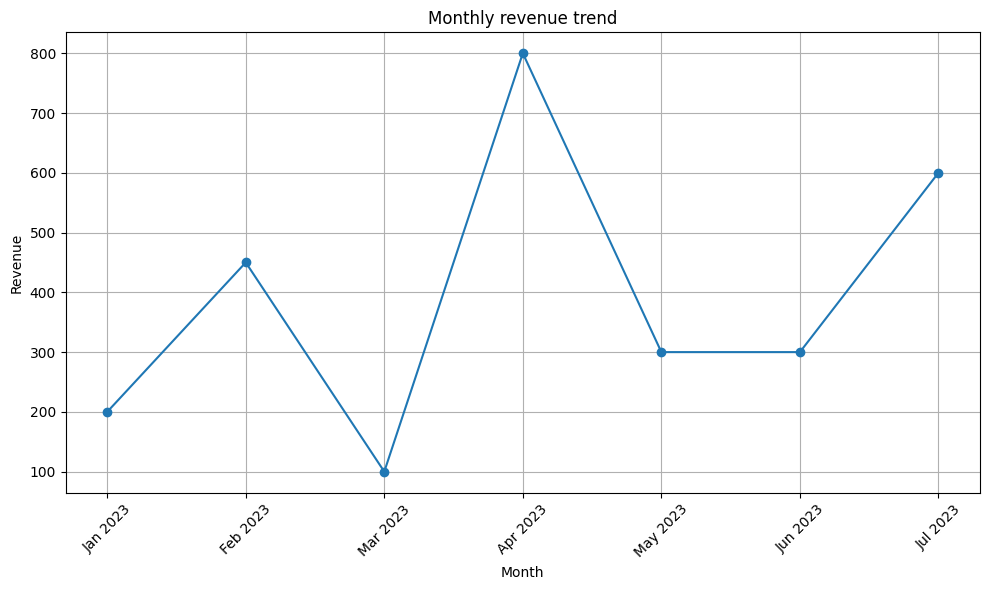

In [8]:
'''

Instruction:
Visualize the trend of monthly revenue using a line chart
'''

# Importing
import matplotlib.pyplot as plt

# creating a simulated data
df['date'] = pd.date_range(start='2023-01-01', periods=len(df), freq='M')

# Extracting the month
df['month'] = df['date'].dt.to_period('M')
monthly_revenue = df.groupby('month')['revenue'].sum().reset_index()
monthly_revenue['month_str'] = monthly_revenue['month'].dt.strftime('%b %Y')

# Plot
plt.figure(figsize=(10,6))
plt.plot(monthly_revenue['month_str'], monthly_revenue['revenue'], marker='o')
plt.title('Monthly revenue trend')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid()
plt.show()


In [21]:
'''
Data cleaning exercise:

Instruction:
Clean the df_cust below from duplicates and handle the missing values using.
After that, add a new column of 'age group' to the dataframe.
'''

# customer dataframe
df_cust = pd.DataFrame({
    'name': ['Andi', 'Budi', 'Citra', 'Andi', 'Andi', 'Dewi'],
    'email': ['andi@mail.com', 'budi@mail.com', 'citra@mail.com', 'andi@mail.com', 'andi@mail.com', 'dewi@mail.com'],
    'age': [23, 35, 61, 23, 23, 42],
    'income': [5000000, 6500000, None, 5000000, 5000000, 6000000]
})

# delete duplicates
df_cust = df_cust.drop_duplicates().reset_index(drop=True)

# Handling missing values with median
df_cust['income'] = df_cust['income'].fillna(df_cust['income'].median())

# Add 'age_group' column
def age_group(age):
    if age < 25:
        return 'Youth'
    elif age <= 60:
        return 'Adult'
    else:
        return 'Senior'

df_cust['age_group'] = df_cust['age'].apply(age_group)
df_cust



,name,email,age,income,age_group
0,Andi,andi@mail.com,23,5000000.0,Youth
1,Budi,budi@mail.com,35,6500000.0,Adult
2,Citra,citra@mail.com,61,6000000.0,Senior
3,Dewi,dewi@mail.com,42,6000000.0,Adult


In [23]:
'''
Please, calculate the revenue per customer from the dataset 'orders'
'''

# Import library
import pandas as pd

# Data frame
orders = pd.DataFrame({
    'order_id': [1, 2, 3, 4, 5],
    'customer_id': [101, 104, 102, 103, 105],
    'product': ['A', 'B', 'A', 'C', 'C'],
    'quantity': [2, 1, 1, 5, 2],
    'price': [50, 100, 50, 20, 20]
})

# Create revenue per customer
orders['revenue'] = orders['quantity']*orders['price']

# Group by customers
revenue_per_customer = orders.groupby('customer_id')['revenue'].sum().reset_index()
revenue_per_customer

,customer_id,revenue
0,101,100
1,102,50
2,103,100
3,104,100
4,105,40


In [16]:
'''

Load dataset 'planets' from seaborn library and find the year with the highest number of planet being found
'''

# Importing library
import pandas as pd
import seaborn as sns

# Load the dataset
planets = sns.load_dataset('planets')

# Show the first few rows
display(planets.head())

# Groupby
new_table = planets.groupby('year')['number'].max().sort_values(ascending=False)
display(new_table.head(1))

print(f'\nThe year of {new_table.index[0]} has the highest number of planets being found')

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


,number
year,
2013,7



The year of 2013 has the highest number of planets being found


## **Merging data**

In [24]:
'''
Please merge both customer and order dataset below
'''

# Customer Data
customers = pd.DataFrame({
    'customer_id': [101, 102, 103],
    'name': ['Alice', 'Bob', 'Clara']
})

# Order Data
orders = pd.DataFrame({
    'order_id': [1, 2, 3, 4],
    'customer_id': [101, 102, 103, 101],
    'product': ['A', 'B', 'C', 'D']
})

# Merge using customer_id
merged = pd.merge(orders, customers, on='customer_id', how='left')

merged

,order_id,customer_id,product,name
0,1,101,A,Alice
1,2,102,B,Bob
2,3,103,C,Clara
3,4,101,D,Alice


In [26]:
'''
Please make a pivot table that display
'''
orders = pd.DataFrame({
    'order_id': [1, 2, 3, 4, 5],
    'customer_id': [101, 101, 102, 103, 101],
    'product': ['A', 'B', 'A', 'C', 'C'],
    'quantity': [2, 1, 1, 5, 2]
})

# Pivot table
pivot_table = pd.pivot_table(
    orders,
    index='customer_id',
    columns='product',
    values='quantity',
    aggfunc='sum',
    fill_value=0
)

pivot_table.reset_index()


product,customer_id,A,B,C
0,101,2,1,2
1,102,1,0,0
2,103,0,0,5


In [56]:
# Creating data frame
df = pd.DataFrame({
    'name' : ['Clara','Michelle', 'Cashey','Kevin'],
    'gender' : ['f','f', 'f', 'm'],
    'id': [111504, 112304, 113456, 213245 ],
    'allowance' : [9000,9000,8500,10000]
})

df

,name,gender,id,allowance
0,Clara,f,111504,9000
1,Michelle,f,112304,9000
2,Cashey,f,113456,8500
3,Kevin,m,213245,10000


In [57]:
# Rename columns and changing index
df = df.rename(columns={'name':'students'}).drop(columns='id')

df


,students,gender,allowance
0,Clara,f,9000
1,Michelle,f,9000
2,Cashey,f,8500
3,Kevin,m,10000


In [58]:
# Creating two dataframes
# DataFrame 1
df_status = pd.DataFrame({
    'name' : ['Clara','Michelle', 'Cashey','Kevin'],
    'gender' : ['f','f', 'f', 'm'],
    'id': [111504, 112304, 113456, 213245 ],
    'allowance' : [9000, 9000, 8500, 10000]
})

# DataFrame 2
df_hobby = pd.DataFrame({
    'name' : ['Clara', 'Michelle', 'Cashey', 'Kevin'],
    'hobby' : ['Reading', 'Painting', 'Dancing', 'Gaming'],
    'favorite_song' : ['Kpop', 'Western', 'Kpop', 'Japanese']
})

display(df_status)
display(df_hobby)

,name,gender,id,allowance
0,Clara,f,111504,9000
1,Michelle,f,112304,9000
2,Cashey,f,113456,8500
3,Kevin,m,213245,10000


,name,hobby,favorite_song
0,Clara,Reading,Kpop
1,Michelle,Painting,Western
2,Cashey,Dancing,Kpop
3,Kevin,Gaming,Japanese


In [61]:
# Using normal filtering (direct)
# Filter students with allowance > 8500
df_filtered = df_status[df_status['allowance'] > 8500]
print(df_filtered)


       name gender      id  allowance
0     Clara      f  111504       9000
1  Michelle      f  112304       9000
3     Kevin      m  213245      10000


In [60]:
# Who has the minimum allowance?

df_status['name'][df_status['allowance'] == df_status['allowance'].min()].values[0]

'Cashey'

In [62]:
# Using loc
# Select rows where gender is female ('f')

df_female = df_status.loc[df_status['gender'] == 'f']
print(df_female)

       name gender      id  allowance
0     Clara      f  111504       9000
1  Michelle      f  112304       9000
2    Cashey      f  113456       8500


In [63]:
# Using iloc
# Select the first 2 rows (index 0 and 1)
df_first_two = df_status.iloc[0:2]
print(df_first_two)

       name gender      id  allowance
0     Clara      f  111504       9000
1  Michelle      f  112304       9000


In [64]:
# Using filter str.contains()
# Find names containing letter "a"
df_contains_a = df_status[df_status['name'].str.contains('a', case=False)]
print(df_contains_a)


     name gender      id  allowance
0   Clara      f  111504       9000
2  Cashey      f  113456       8500


In [66]:
# Using merge()
# Merge df_status and df_hobby based on name
merged_df = pd.merge(df_status, df_hobby, on='name', how='left')
print(merged_df)

       name gender      id  allowance     hobby favorite_song
0     Clara      f  111504       9000   Reading          Kpop
1  Michelle      f  112304       9000  Painting       Western
2    Cashey      f  113456       8500   Dancing          Kpop
3     Kevin      m  213245      10000    Gaming      Japanese


In [67]:
# Using concat()
# Stack the merged table vertically
concat_df = pd.concat([df_status, df_hobby], axis=0, ignore_index=True)
print(concat_df)


       name gender        id  allowance     hobby favorite_song
0     Clara      f  111504.0     9000.0       NaN           NaN
1  Michelle      f  112304.0     9000.0       NaN           NaN
2    Cashey      f  113456.0     8500.0       NaN           NaN
3     Kevin      m  213245.0    10000.0       NaN           NaN
4     Clara    NaN       NaN        NaN   Reading          Kpop
5  Michelle    NaN       NaN        NaN  Painting       Western
6    Cashey    NaN       NaN        NaN   Dancing          Kpop
7     Kevin    NaN       NaN        NaN    Gaming      Japanese


In [68]:
# Using concat()
# Stack the merged table horizontally
concat_horizontal = pd.concat([df_status, df_hobby], axis=1)
print(concat_horizontal)


       name gender      id  allowance      name     hobby favorite_song
0     Clara      f  111504       9000     Clara   Reading          Kpop
1  Michelle      f  112304       9000  Michelle  Painting       Western
2    Cashey      f  113456       8500    Cashey   Dancing          Kpop
3     Kevin      m  213245      10000     Kevin    Gaming      Japanese


In [69]:
# Using join()

df_status_indexed = df_status.set_index('name')
df_hobby_indexed = df_hobby.set_index('name')

joined_df = df_status_indexed.join(df_hobby_indexed)
print(joined_df)


         gender      id  allowance     hobby favorite_song
name                                                      
Clara         f  111504       9000   Reading          Kpop
Michelle      f  112304       9000  Painting       Western
Cashey        f  113456       8500   Dancing          Kpop
Kevin         m  213245      10000    Gaming      Japanese
